In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## CLEANING THE DATA
df = pd.read_csv("C:/Users/User1/mlprojekti/songs.csv", encoding='ISO-8859-1') # Read the data

timbres = [elem for elem in df.columns if "timbre" in elem or "confidence" in elem] # Create a list of all column names that contain "timbre" or "confidence"

df.drop(timbres, axis=1, inplace = True) # Drop all columns names that contain "timbre" or "confidence"
df.drop(["pitch"], axis=1, inplace = True) # Drop column "pitch"


df1 = df.groupby("songID").filter(lambda x: (1 in x["Top10"].values) and (0 in x["Top10"].values))  # Check how many songs have at least 2 observations, one with Top10 == 1 and one with Top10 == 0
# len(df1)) == 0. 0 songs have been on the top 10 chart in some year but have not been on the chart in some other year.
# This means that it is enough to simply remove duplicate songs

df = df.drop_duplicates(subset=["songID"], keep="first") # Remove duplicate songs, keep the first instance
df.drop(["artistname", "artistID", "year", "songID"], axis=1, inplace = True) # Drop more columns that will not be useful

df["songnamelength"] = df["songtitle"].str.len() # Create new column that states the number of characters in the title of the song
df.drop(["songtitle"], axis=1, inplace = True) # Remove column for the song title as it is not needed anymore

df.dropna(axis=0, inplace=True) # Remove rows with NA values

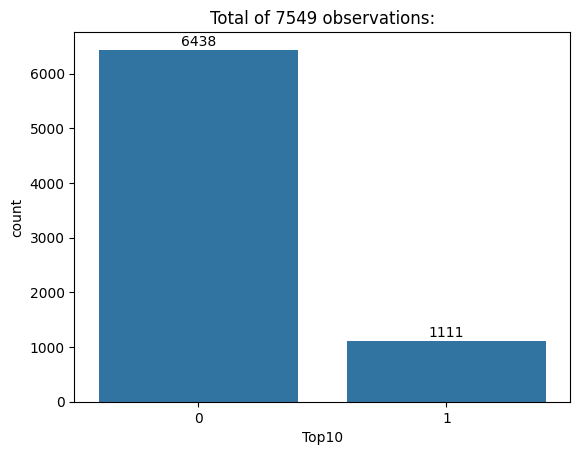

In [6]:
#PLOTTING
ax = sns.countplot(x="Top10", data=df)
plt.title(f"Total of {len(df)} observations:")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x()+p.get_width()/2, p.get_height()), ha = 'center', va = 'baseline', 
                fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')
plt.show()

In [12]:
y = df["Top10"] # Label vector
X = df.drop(["Top10"], axis=1) # Feature vectors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Split data into training and testing data

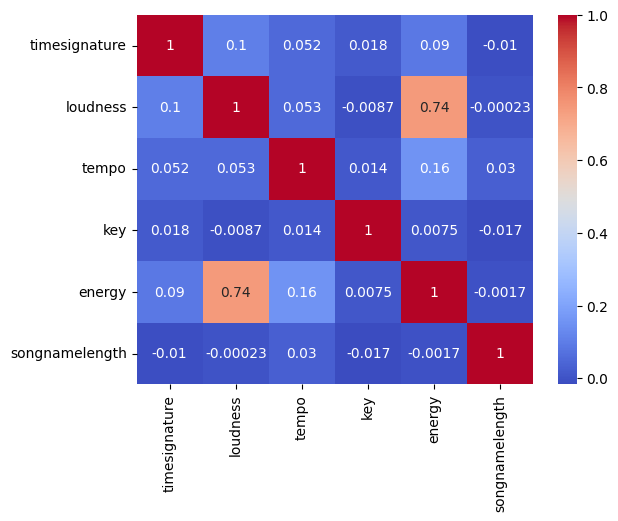

In [18]:
correlation_matrix = X.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [22]:
clf = LogisticRegression(class_weight='balanced')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)


0.6185430463576159


In [25]:
for feature in df.columns:
    if feature != "Top10":
        X_train1, X_test1, y_train1, y_test1 = train_test_split(df[[feature]], df["Top10"], test_size=0.2, random_state=42)
        clf2 = LogisticRegression(class_weight='balanced')
        clf2.fit(X_train1, y_train1)
        y_pred1 = clf2.predict(X_test1)
        accuracy1 = accuracy_score(y_test1, y_pred1)
        print(f"Feature: {feature}, Accuracy: {accuracy1}")

Feature: timesignature, Accuracy: 0.22251655629139072
Feature: loudness, Accuracy: 0.6185430463576159
Feature: tempo, Accuracy: 0.46556291390728477
Feature: key, Accuracy: 0.5033112582781457
Feature: energy, Accuracy: 0.6125827814569537
Feature: songnamelength, Accuracy: 0.4562913907284768
